# Part 2

In [1]:
"I (We) certify that the code and data in this assignment were generated independently, using only the tools and resources defined in the course and that I (we) did not receive any external help, coaching or contributions during the production of this work."


'I (We) certify that the code and data in this assignment were generated independently, using only the tools and resources defined in the course and that I (we) did not receive any external help, coaching or contributions during the production of this work.'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("datasets/penguins.csv")

In [4]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


In [6]:
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,333.000000,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057,2008.042042
std,5.468668,1.969235,14.015765,805.215802,0.812944
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.500000,15.600000,190.000000,3550.000000,2007.000000
50%,44.500000,17.300000,197.000000,4050.000000,2008.000000
75%,48.600000,18.700000,213.000000,4775.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


In [9]:
print(df['species'].unique())
print(df['island'].unique())
print(df['sex'].unique())
print(df['year'].unique())

['Adelie' 'Gentoo' 'Chinstrap']
['Torgersen' 'Biscoe' 'Dream']
['male' 'female']
[2007 2008 2009]


In [10]:
# Converting categorical features

df['species'] = df['species'].astype('category')
df['island'] = df['island'].astype('category')
df['sex'] = df['sex'].astype('category')
df['year'] = df['year'].astype('category') 
# I'm converting year also to categorical variable although it's ordinal. 
# It has only 3 values so I don't think the order would influence much.

In [11]:
# normalizing the df

df_normalized = df.copy()

for col in df_normalized.columns:
    if df_normalized[col].dtypes == float:
        df_normalized[col] = (df_normalized[col] - df_normalized[col].min()) / (df_normalized[col].max() - df_normalized[col].min())

In [12]:
df_normalized.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,0.432465,0.483912,0.490966,0.418627
std,0.198861,0.234433,0.237555,0.223671
min,0.000000,0.000000,0.000000,0.000000
25%,0.269091,0.297619,0.305085,0.236111
50%,0.450909,0.500000,0.423729,0.375000
75%,0.600000,0.666667,0.694915,0.576389
max,1.000000,1.000000,1.000000,1.000000


In [13]:
# One-hot encoding the categorical variables
df_normalized = pd.get_dummies(df_normalized, drop_first=True)

df_normalized.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species_Chinstrap,species_Gentoo,island_Dream,island_Torgersen,sex_male,year_2008,year_2009
0,0.254545,0.666667,0.152542,0.291667,0,0,0,1,1,0,0
1,0.269091,0.511905,0.237288,0.305556,0,0,0,1,0,0,0
2,0.298182,0.583333,0.389831,0.152778,0,0,0,1,0,0,0
4,0.167273,0.738095,0.355932,0.208333,0,0,0,1,0,0,0
5,0.261818,0.892857,0.305085,0.263889,0,0,0,1,1,0,0


In [14]:
# Creating Y and X dataframes
Y = df_normalized[['sex_male']]
X = df_normalized.drop(['sex_male'], axis=1)

In [15]:
# Split the data into train and test
np.random.seed(8)

train_size = int(0.8 * Y.shape[0])
indis = list(range(Y.shape[0]))
np.random.shuffle(indis)
# print(indis)

train_indis = indis[:train_size]
test_indis = indis[train_size:]

y_train, y_test = Y.iloc[train_indis], Y.iloc[test_indis]
X_train, X_test = X.iloc[train_indis], X.iloc[test_indis]

X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy().reshape(-1)
y_test = y_test.to_numpy().reshape(-1)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(266, 10) (67, 10) (266,) (67,)


In [16]:
# Logistic Regression class

class LogitRegression():
    def __init__(self, learning_rate, iterations):
        self.learning_rate = learning_rate
        self.iterations = iterations
    
    def fit(self, X_train, y_train):
        self.X = X_train
        self.Y = y_train
        np.random.seed(8)
        self.w = np.random.uniform(0, 1, self.X.shape[1])
        self.b = np.random.uniform(0, 1)
        self.loss = []
        for i in range(self.iterations):
            self.loss.append(self.cost())
            self.gradient_descent()
        return self.loss, self.w, self.b
    
    def sigmoid(self, z):
        self.z = z
        return 1 / (1 + np.exp(-self.z))
        
    def cost(self):
        h = self.sigmoid(np.dot(self.X, self.w) + self.b)
        self.J = - 1.0/self.X.shape[0] * np.sum(self.Y*np.log(h) + (1-self.Y)*(np.log(1-h)))
        return self.J
        
    def gradient_descent(self):
        pred = self.sigmoid(np.dot(self.X, self.w) + self.b)
        delta = pred - self.Y
        dw = 1/self.X.shape[0]*np.dot(delta, self.X)
        db = 1/self.X.shape[0]*np.sum(delta.T)
        self.w = self.w - self.learning_rate * dw
        # self.w = self.w.reshape(-1)
        self.b = self.b - self.learning_rate * db
        
    def predict(self, X):              
        return np.where(self.sigmoid(np.dot(X, self.w) + self.b) >= 0.5, 1, 0)
    

In [17]:
model1 = LogitRegression(learning_rate=10**-6, iterations=100000)
loss1, w1, b1 = model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)
accuracy1 = sum(y_pred1 == y_test)/len(y_test)
print(accuracy1)

0.47761194029850745


In [18]:
model2 = LogitRegression(learning_rate=10**-4, iterations=100000)
loss2, w2, b2 = model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
accuracy2 = sum(y_pred2 == y_test)/len(y_test)
print(accuracy2)

0.6865671641791045


In [19]:
model3 = LogitRegression(learning_rate=10**-2, iterations=100000)
loss3, w3, b3 = model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)
accuracy3 = sum(y_pred3 == y_test)/len(y_test)
print(accuracy3)

0.8656716417910447


In [20]:
model4 = LogitRegression(learning_rate=10**-1, iterations=100000)
loss4, w4, b4 = model4.fit(X_train, y_train)
y_pred4 = model4.predict(X_test)
accuracy4 = sum(y_pred4 == y_test)/len(y_test)
print(accuracy4)

0.8805970149253731


In [21]:
model5 = LogitRegression(learning_rate=50, iterations=100000)
loss5, w5, b5 = model5.fit(X_train, y_train)
y_pred5 = model5.predict(X_test)
accuracy5 = sum(y_pred5 == y_test)/len(y_test)
print(accuracy5)

<ipython-input-16-1ece3169e6d1>:26: RuntimeWarning: divide by zero encountered in log
  self.J = - 1.0/self.X.shape[0] * np.sum(self.Y*np.log(h) + (1-self.Y)*(np.log(1-h)))
<ipython-input-16-1ece3169e6d1>:26: RuntimeWarning: invalid value encountered in multiply
  self.J = - 1.0/self.X.shape[0] * np.sum(self.Y*np.log(h) + (1-self.Y)*(np.log(1-h)))


0.6268656716417911


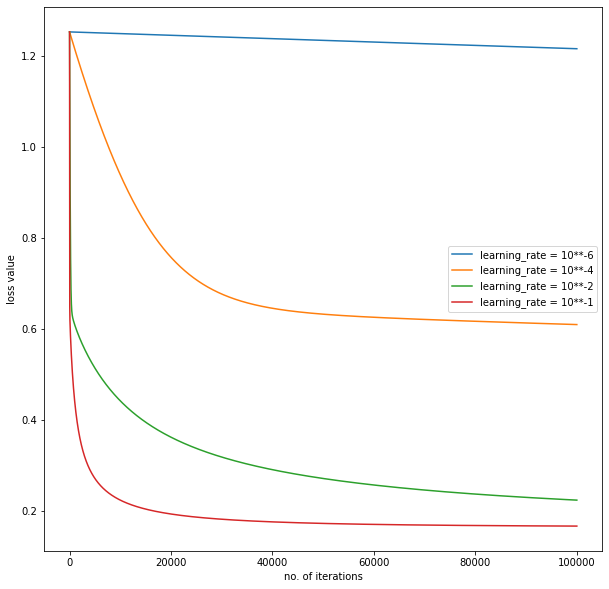

In [22]:
plt.figure(figsize=(10,10))
plt.plot(loss1, label="learning_rate = 10**-6")
plt.plot(loss2, label="learning_rate = 10**-4")
plt.plot(loss3, label="learning_rate = 10**-2")
plt.plot(loss4, label="learning_rate = 10**-1")
plt.xlabel("no. of iterations")
plt.ylabel("loss value")
plt.legend()
plt.show()

In [23]:
print("w = ", w4, "\n", "b = ", b4)

w =  [15.79864806 14.78547437  2.92343298 18.38368783 -6.60359013 -6.99921642
  0.61079625 -0.16970228  0.04841794  0.30214185] 
 b =  -19.362184424588865


## References

1. https://numpy.org/doc/stable/reference/random/generated/numpy.random.shuffle.html
2. https://stackoverflow.com/questions/3030480/how-do-i-select-elements-of-an-array-given-condition